In [149]:
import pandas as pd

In [150]:
df = pd.read_csv('cardio_train.csv',sep=';')  # datamızı dosyadan okuyoruz.
df.head()                                     #Datamızı görüntülüyoruz.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [151]:
df.drop('id' , axis=1 , inplace=True)  # id sütununu çıkarıyoruz.

In [152]:
df.info()  #dataframe incelemesi

# 12 adet sütun 70k veri bulunmakta ve veriler eksiksiz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [153]:
print("{} adet var.".format(df.duplicated().sum()))  # Tekrar eden verilerin sayısını öğrendik

24 adet var.


In [154]:
dp = df[df.duplicated(keep=False)]   # Tekrar eden verileri bir değişkene tanımladık
dp = dp.sort_values(by=['age','gender','height'],ascending = False)   # bu verileri belirttiğimiz başlıklar altına aldık.
dp.head(2)  # tanımladığımız değişkeni görüntüledik.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [155]:
df.drop_duplicates(inplace=True)  # tekrarlayan verileri datamız içerisinden çıkardık.
print("{} adet var.".format(df.duplicated().sum()))  # tekrarlayan verilerden kurtulduk.

0 adet var.


In [156]:
df.describe().T    #aykırı değerleri görebilmek için datamızın transpozunu alıyoruz.

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.950126,2467.374620,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


Yukarıda gösterilen verilerin uzunluk ve ağırlık sütunlarının maximum ve minimum değerlerini görüntülüyoruz.
Bu tabloya göre datamızda olağandışı veriler bulunmakta.
Bunun için veriyi seaborn ve matplob kütüphanelerinde grafiğe dökerek inceleyeceğiz.

<AxesSubplot: xlabel='cardio', ylabel='weight'>

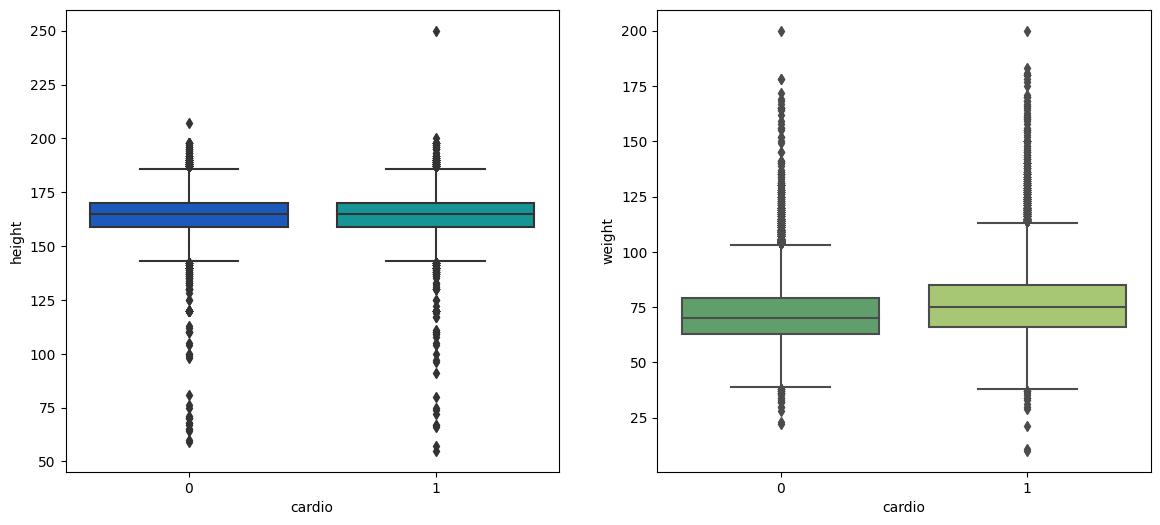

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

yukarıda veriyi grafiğe dökerek incelediğimizde uzunluk verilerinin 160-180 arası
ağırlık verilerinin ise 60-90 arasında yaygın olduğunu görüntülüyoruz.
* verimiz içinde 80 cm boyunda ve 165 kg ağırlıkta olan veriler var
* bu verilerden kurtulmamız gerek.

Verimizi sadeleştirmek için vücut kitle indexine çevirerek devam edeceğiz.

In [158]:
df["bmi"] = (df["weight"] / (df['height'] / 100)**2).round(1)

#burada ağırlık ve uzunluk verimizi vücut kitle indexine çeviriyoruz.

In [159]:
df.head()


# Veriyi incelediğimizde kişilerin yaşı gün olarak verilmiş bunu düzeltelim.
# Vücut kitle endexi (bmi) içinde olağandışı verileri silerek verimizi daha tutarlı hale getirelim.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [160]:
df = df[(df["bmi"]>10) & (df["bmi"])<100]

# datamızı içinde sadece bmi 'ı 10 dan büyük ve 100 den küçük olacak şekilde tekrar tanımladık.

In [161]:
df.drop(["weight","height"],axis = 1, inplace=True)

# Vücut kitle endexi (bmi) içinde olağandışı verileri silerek verimizi daha tutarlı hale getirdik.

#### Datamızın transpozuna döndüğümüzde

* Kan basıncı değerlerindeki 0 ' ın altındaki değerleri görüyoruz
* Aynı şekilde 180 ve 120 den yüksek değerlerin acil durum oluşturduğu bilerek tutarsız 
* verilerden burada da kurtulacağız


In [162]:
df = df[(df['ap_hi']<250) & (df['ap_lo']<200)]
df = df[(df['ap_hi']>20) & (df['ap_lo']>20)]

df['age'] = df['age'] / 365

#Kan basıncı değerlerini düzelttik.
#Gün sayısı olarak verilen yaşı düzelttik.

In [163]:
df['cholesterol'].unique()

#kolesterol değerleri 3 kategoride değerlendirilmiş.
#bu durumda modelimiz 3 ü 2 den yüksek görebilir düzeltmeye gidiyoruz.

array([1, 3, 2])

In [164]:
df['cholesterol'] = df['cholesterol'].map({ 1: 'normal', 2 : 'aboveNormal', 3: 'wellAboveNormal'})
df['gluc'] = df['gluc'].map({ 1: 'normal', 2 : 'aboveNormal', 3: 'wellAboveNormal'})

#kategorileri adlandırdık

dummies = pd.get_dummies(df[['cholesterol','gluc']])

#dummy değişken tanımlıyoruz.dummy değişken her bir kategori için bir değişken oluşturuyor.
# bu şekilde modele verdiğimizde nominal değişkenlerimiz birbirine üstünlük sağlamamış oluyor.

final_df = pd.concat([df,dummies],axis=1)
final_df.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_aboveNormal,cholesterol_normal,cholesterol_wellAboveNormal,gluc_aboveNormal,gluc_normal,gluc_wellAboveNormal
0,50.391781,2,110,80,0,0,1,0,22.0,0,1,0,0,1,0
1,55.419178,1,140,90,0,0,1,1,34.9,0,0,1,0,1,0
2,51.663014,1,130,70,0,0,0,1,23.5,0,0,1,0,1,0
3,48.282192,2,150,100,0,0,1,1,28.7,0,1,0,0,1,0
4,47.873973,1,100,60,0,0,0,0,23.0,0,1,0,0,1,0


In [165]:
# Son olarak gender değişkeninde 2 değerini 0 yapmak istiyorum.

final_df['gender'] = final_df['gender'] % 2

In [166]:
from sklearn.model_selection import train_test_split


y = final_df['cardio']
x = final_df.drop("cardio",axis = 1)


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=17)

In [167]:
x_train.shape

(48129, 14)

In [168]:
x_test.shape

(20628, 14)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='lbfgs' , max_iter=400)

# logisticregression u oluşturduk

logreg.fit(x_train,y_train)

# fit modelini kullanarak eğitiyoruz.

y_pred = pd.Series(logreg.predict(x_test))

# predict kullanarak eğitime sokmadığımız x_test verileriyle ilgili tahminler oluşturuyoruz ve
# y_pred değişkenine bunu tanımlıyoruz.

accuracy_score(y_test,y_pred)

# modelin doğruluk oranını görüntülemek için eğitimde hiç görmediğimiz sonuç verilerinin
# tanımlamış olduğumuz tahmin değerleriyle ilgili oranına bakacağız.

0.7293969362032189